In [8]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split



In [9]:
#X, y = load_boston(return_X_y=True)
boston_dataset=load_boston()
#X=np.array(X)
#y=np.array(y)
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head(100)

X=boston[['AGE','RM']]
X=np.array(X)
#print(X)

Y=boston_dataset.target
Y=np.array(Y)

Y=Y.reshape(506,1)
#print(Y.shape)

In [10]:
class AdalineRegressor:
  def __init__(self):
    pass

  def fit(self,X_train,Y_train):
    #w=(x.T*x)^-1*x.T*y
    self.w=np.matmul(np.linalg.inv(np.matmul(X_train.T,X_train)),np.matmul(X_train.T,Y_train))
    #print(self.w.shape)
    print(self.w)

  def predict(self,X_test):
    Y_pred=np.matmul(X_test,self.w)  
    return Y_pred

  def evaluate(self,X_test,Y_test):
    Y_pred=np.matmul(X_test,self.w)
    subtract=np.abs(Y_test-Y_pred)
    #return subtract

    #MAE
    MAE=np.mean(subtract)
    #print("MAE =",MAE)

    #MSE
    MSE=np.mean(np.square(subtract))
    return MAE,MSE



In [11]:

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=30)

In [12]:
model=AdalineRegressor()
model.fit(X_train,y_train)

y_pred=model.predict(X_test)
MAE,MSE=model.evaluate(X_test,y_test)
print("MAE =",MAE)
print("MSE =",MSE)
#print(y_pred)


[[-0.11782797]
 [ 4.92265742]]
MAE = 4.496512847727152
MSE = 43.36388887645207


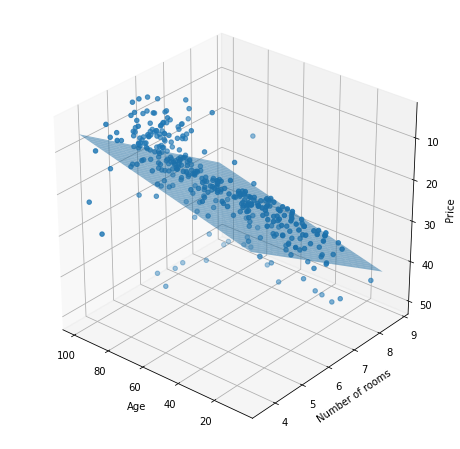

In [13]:

#plot 3d plane
fig = plt.figure(figsize=(8,8))
p = fig.add_subplot(111,projection='3d')

x = np.arange(X_train[:,0].min(), X_train[:,0].max())
y = np.arange(X_train[:,1].min(), X_train[:,1].max())

x, y = np.meshgrid(x, y)

plane = x *model.w[0] + y *model. w[1]

p.plot_surface(x, y, plane,alpha=0.5)

p.scatter(X_train[:,0], X_train[:,1], y_train)

p.set_xlabel('Age')
p.set_ylabel('Number of rooms')#RM
p.set_zlabel('Price')
p.view_init(-150,50)#angle of the plane
plt.show()

